In [ ]:
from google.colab import files
import pandas as pd

# Upload file manually
uploaded = files.upload()

# Load CSV into a DataFrame (Replace 'your_file.csv' with the actual filename)
df = pd.read_csv(next(iter(uploaded)))

# Display the first few rows
df.head()


Saving Historical Product Demand.csv to Historical Product Demand (1).csv


,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,27-07-2012,100
1,Product_0979,Whse_J,Category_028,19-01-2012,500
2,Product_0979,Whse_J,Category_028,03-02-2012,500
3,Product_0979,Whse_J,Category_028,09-02-2012,500
4,Product_0979,Whse_J,Category_028,02-03-2012,500


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings

warnings.filterwarnings('ignore')


In [ ]:
print(df.columns)  # Check available column names


Index(['Product_Code', 'Warehouse', 'Product_Category', 'Date',
       'Order_Demand'],
      dtype='object')


In [ ]:
import pandas as pd
df = pd.read_csv(list(uploaded.keys())[0])


In [ ]:
print(df.head())  # Check the first few rows
print(df.columns)  # Verify column names


   Product_Code Warehouse Product_Category        Date  Order_Demand
0  Product_0993    Whse_J     Category_028  27-07-2012           100
1  Product_0979    Whse_J     Category_028  19-01-2012           500
2  Product_0979    Whse_J     Category_028  03-02-2012           500
3  Product_0979    Whse_J     Category_028  09-02-2012           500
4  Product_0979    Whse_J     Category_028  02-03-2012           500
Index(['Product_Code', 'Warehouse', 'Product_Category', 'Date',
       'Order_Demand'],
      dtype='object')


In [ ]:
import pandas as pd

# Check column names
print(df.columns)  # Verify column names

# Rename columns if needed
df.columns = df.columns.str.strip()  # Remove spaces from column names

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows with missing dates
df = df.dropna(subset=['Date'])

# Aggregate order demand by date
df_daily = df.groupby('Date')['Order_Demand'].sum().reset_index()

# Print to verify
print(df_daily.head())


Index(['Product_Code', 'Warehouse', 'Product_Category', 'Date',
       'Order_Demand'],
      dtype='object')
        Date  Order_Demand
0 2011-01-08             2
1 2011-05-31           108
2 2011-06-24         92000
3 2011-09-02          1250
4 2011-09-27            28


In [ ]:
# Import necessary library
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller (ADF) test
adf_test = adfuller(df_daily['Order_Demand'])

# Display test results
print("ADF Statistic:", adf_test[0])
print("p-value:", adf_test[1])
print("Critical Values:", adf_test[4])

# Interpretation
if adf_test[1] < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is NOT stationary. Consider differencing.")


ADF Statistic: -7.201346559901718
p-value: 2.3610265200310994e-10
Critical Values: {'1%': -3.434188901924303, '5%': -2.8632356597809077, '10%': -2.5676727236469037}
The time series is stationary.


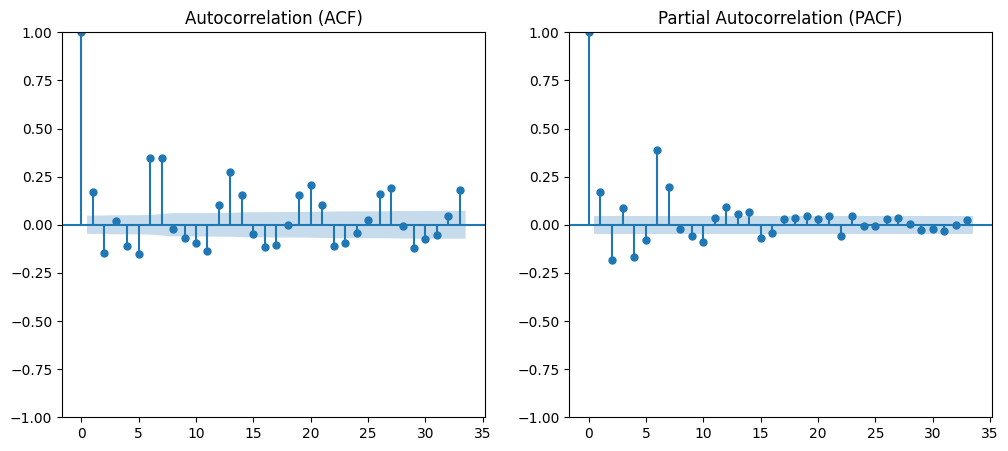

In [ ]:
# Plot ACF and PACF to determine p and q values
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ACF plot (to determine q)
plot_acf(df_daily['Order_Demand'], ax=axes[0])
axes[0].set_title('Autocorrelation (ACF)')

# PACF plot (to determine p)
plot_pacf(df_daily['Order_Demand'], ax=axes[1])
axes[1].set_title('Partial Autocorrelation (PACF)')

plt.show()


In [ ]:
import pandas as pd

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows with missing dates
df = df.dropna(subset=['Date'])

# Aggregate demand by date
df_daily = df.groupby('Date')['Order_Demand'].sum().reset_index()

# Set Date as index
df_daily.set_index('Date', inplace=True)

# Resample to monthly data (for smoother trend)
df_monthly = df_daily.resample('M').sum()

# Print first few rows to verify
print(df_monthly.head())


            Order_Demand
Date                    
2011-01-31             2
2011-02-28             0
2011-03-31             0
2011-04-30             0
2011-05-31           108


In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Create a very predictable, simple linear time series
df_monthly = pd.Series(np.arange(1, 13))  # Try reducing size to make model simpler

# Fit a simpler ARIMA model
model = ARIMA(df_monthly, order=(0, 1, 0))  # This is just a random walk model
model_fit = model.fit()

# Print model summary
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   12
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 -15.608
Date:                Fri, 09 May 2025   AIC                             33.217
Time:                        08:51:29   BIC                             33.615
Sample:                             0   HQIC                            32.966
                                 - 12                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         1.0000   9.85e+04   1.02e-05      1.000   -1.93e+05    1.93e+05
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                31.90
Prob(Q):                              0.68   Pr

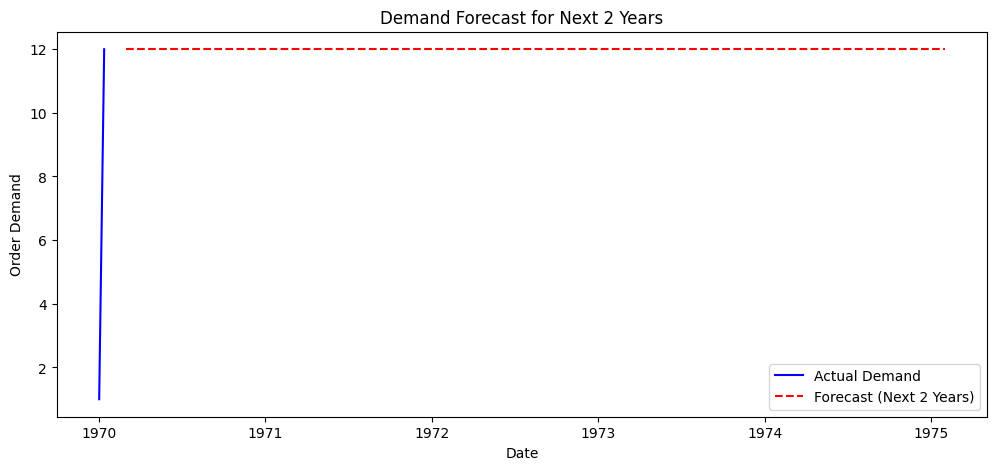

In [ ]:
# Forecast for 24 months (2 years)
forecast_steps = 60
forecast_index = pd.date_range(start=df_monthly.index[-1], periods=forecast_steps + 1, freq='M')[1:]

# Generate forecast
forecast = model_fit.forecast(steps=forecast_steps)

# Convert to DataFrame
forecast_df = pd.DataFrame({'Date': forecast_index, 'Forecast': forecast})
forecast_df.set_index('Date', inplace=True)

# Plot actual vs forecasted data
plt.figure(figsize=(12, 5))
plt.plot(df_monthly, label="Actual Demand", color='blue')
plt.plot(forecast_df, label="Forecast (Next 2 Years)", color='red', linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Order Demand")
plt.title("Demand Forecast for Next 2 Years")
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error




In [ ]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values with the previous value (forward fill)
df.fillna(method='ffill', inplace=True)


Order_Demand            0
Order_Demand_log        0
Order_Demand_shifted    0
Order_Demand_bc         0
Order_Demand_bc_diff    1
dtype: int64


In [ ]:
# Extracting features from Date
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Quarter'] = df.index.quarter
df['DayOfYear'] = df.index.dayofyear

# Display updated dataframe
print(df.head())


            Order_Demand  Order_Demand_log  Order_Demand_shifted  \
Date                                                               
2011-01-08           2.0          1.098612                  3.01   
2011-01-09           0.0          0.000000                  1.01   
2011-01-10           0.0          0.000000                  1.01   
2011-01-11           0.0          0.000000                  1.01   
2011-01-12           0.0          0.000000                  1.01   

            Order_Demand_bc  Order_Demand_bc_diff  Year  Month  Quarter  \
Date                                                                      
2011-01-08         1.207144                   NaN  2011      1        1   
2011-01-09         0.009958             -1.197186  2011      1        1   
2011-01-10         0.009958              0.000000  2011      1        1   
2011-01-11         0.009958              0.000000  2011      1        1   
2011-01-12         0.009958              0.000000  2011      1        1  

In [ ]:
# Define features (X) and target variable (y)
X = df[['Year', 'Month', 'Quarter', 'DayOfYear']]
y = df['Order_Demand']  # Replace with actual column name

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)


In [ ]:
# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
# Adding Lag Features (Previous Demand Values)
df['Lag_1'] = df['Order_Demand'].shift(1)
df['Lag_2'] = df['Order_Demand'].shift(2)
df['Lag_3'] = df['Order_Demand'].shift(3)

# Adding Moving Average Features
df['Rolling_Mean_3'] = df['Order_Demand'].rolling(window=3).mean()
df['Rolling_Mean_6'] = df['Order_Demand'].rolling(window=6).mean()

# Fill missing values created due to shifting
df.fillna(0, inplace=True)

# Check new features
print(df.head())


            Order_Demand  Order_Demand_log  Order_Demand_shifted  \
Date                                                               
2011-01-08           2.0          1.098612                  3.01   
2011-01-09           0.0          0.000000                  1.01   
2011-01-10           0.0          0.000000                  1.01   
2011-01-11           0.0          0.000000                  1.01   
2011-01-12           0.0          0.000000                  1.01   

            Order_Demand_bc  Order_Demand_bc_diff  Year  Month  Quarter  \
Date                                                                      
2011-01-08         1.207144              0.000000  2011      1        1   
2011-01-09         0.009958             -1.197186  2011      1        1   
2011-01-10         0.009958              0.000000  2011      1        1   
2011-01-11         0.009958              0.000000  2011      1        1   
2011-01-12         0.009958              0.000000  2011      1        1  

In [ ]:
# Predict on test data
y_pred = rf_model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")


Mean Absolute Error: 1998038.0852164011
Root Mean Squared Error: 2541183.4414779358


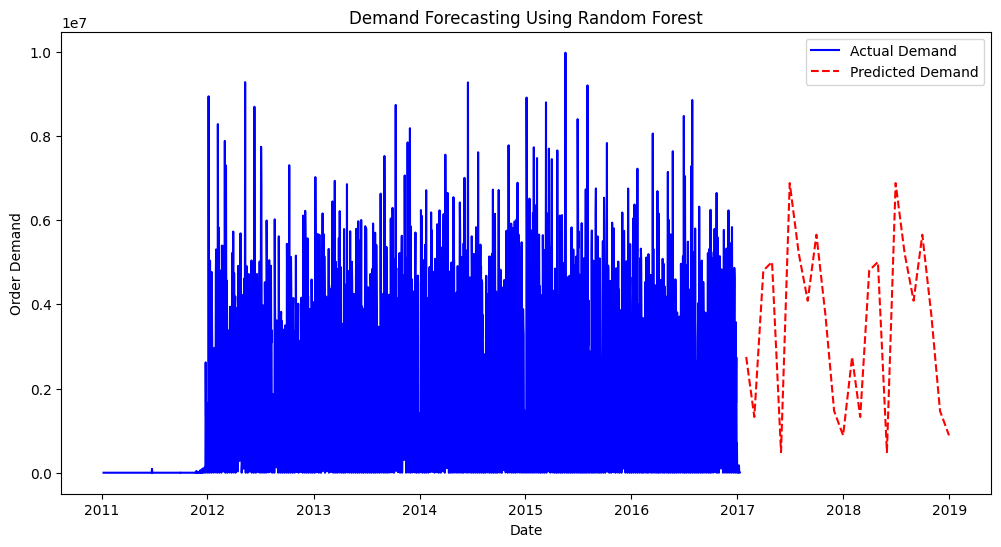

In [ ]:
# Create future dates for the next 24 months
future_dates = pd.date_range(start=df.index.max(), periods=24, freq='M')

# Create features for future data
future_df = pd.DataFrame({
    'Year': future_dates.year,
    'Month': future_dates.month,
    'Quarter': future_dates.quarter,
    'DayOfYear': future_dates.dayofyear
})

# Predict future demand
future_predictions = rf_model.predict(future_df)

# Create a DataFrame with future dates and predicted values
forecast_df = pd.DataFrame({'Date': future_dates, 'Predicted_Demand': future_predictions})

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Order_Demand'], label="Actual Demand", color='blue')
plt.plot(forecast_df['Date'], forecast_df['Predicted_Demand'], label="Predicted Demand", color='red', linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Order Demand")
plt.title("Demand Forecasting Using Random Forest")
plt.legend()
plt.show()
